In [3]:
pip install keras-tcn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Nouran\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Masking
from tensorflow.keras.utils import to_categorical
from tcn import TCN

In [5]:
df= pd.read_csv('D:\year 3\Semester 2\Data Science\Sales-Customer-Behavior-Analysis\Preprocessing\Preprocessed dataset\Preprocessed Time Series Final.csv')

In [6]:
df.head()

product_id          category_id     price    user_id  \
0    44600062  2103807459595387724 -0.710172  541312140   
1     1004545  2053013555631882655  0.768298  537918940   
2    29800030  2053013559842964121 -0.336330  555306597   
3    16800186  2053013558316237377  0.159003  555446365   
4     1005020  2053013555631882655 -0.523655  550859983   

                           user_session  category_code_0  category_code_1  \
0  72d76fde-8bb3-4e00-8c23-a032dfed738c                0                0   
1  406c46ed-90a4-4787-a43b-59a410c1a5fb                0                0   
2  3a374230-2ac7-429d-8fe0-92ad8fdc6b28                0                0   
3  7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4                0                0   
4  4718c88d-1892-4a5f-931a-f61ad7a20459                0                0   

   category_code_2  category_code_3  category_code_4  ...  brand_3  brand_4  \
0                0                0                0  ...        0        0   
1                0                0                0  ...        0        0   
2                0                0                0  ...        0        0   
3                0                0                0  ...        0        0   
4                0                0                0  ...        0        0   

   brand_5  brand_6  brand_7  brand_8  brand_9  brand_10  brand_11  event_type  
0        0        0        0        0        0         0         1        view  
1        0        0        0        0        0         1         0        view  
2        0        0        0        0        0         1         1        view  
3        0        0        0        0        0         1         1        view  
4        0        0        0        0        1         0         0        view  

[5 rows x 25 columns]

In [7]:
features = ['price'] + [f'category_code_{i}' for i in range(5)] + [f'brand_{i}' for i in range(12)]

In [8]:
 #Step 2: Prepare X and y
X = df[features].values  # shape (num_samples, num_features)
y = df['event_type'].values  # labels (strings)


In [9]:
# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)
y_onehot = to_categorical(y_encoded, num_classes=num_classes)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded)


In [11]:
# Reshape input for TCN: (samples, timesteps, features)
seq_length = 1
num_features = len(features)
X_train = X_train.reshape((X_train.shape[0], seq_length, num_features))
X_test = X_test.reshape((X_test.shape[0], seq_length, num_features))


In [12]:
# Build TCN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(seq_length, num_features)))
model.add(TCN(64))  # 64 filters in TCN layer
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'tcn' (of type TCN) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'conv1D_0' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'matching_conv1D' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'residual_block_0' (of type ResidualBlock) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream la

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 287s 14ms/step - accuracy: 0.9603 - loss: 0.1895 - val_accuracy: 0.9607 - val_loss: 0.1848
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 283s 14ms/step - accuracy: 0.9606 - loss: 0.1829 - val_accuracy: 0.9607 - val_loss: 0.1821
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 270s 14ms/step - accuracy: 0.9607 - loss: 0.1822 - val_accuracy: 0.9607 - val_loss: 0.1837
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 284s 14ms/step - accuracy: 0.9604 - loss: 0.1826 - val_accuracy: 0.9607 - val_loss: 0.1822
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 246s 12ms/step - accuracy: 0.9602 - loss: 0.1834 - val_accuracy: 0.9607 - val_loss: 0.1814
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 219s 11ms/step - accuracy: 0.9610 - loss: 0.1800 - val_accuracy: 0.9607 - val_loss: 0.1813
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 202s 10ms/step - accuracy: 0.9607 - loss: 0.1807 - val_accuracy: 0.9607 - val_loss: 0.1809
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 203s 10ms/step - accur

In [15]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9605 - loss: 0.1818
Test Accuracy: 0.9606


C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'conv1D_0' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'matching_conv1D' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'residual_block_0' (of type ResidualBlock) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream la

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


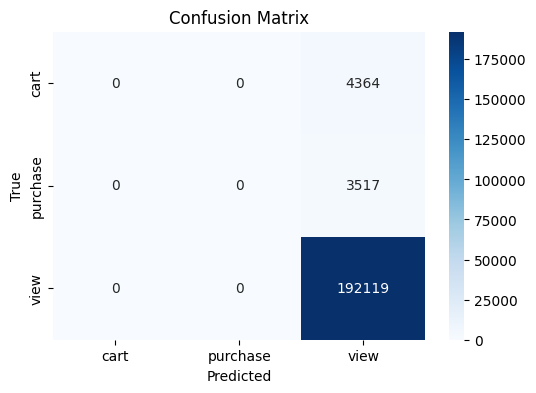

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Get predicted classes for test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
#save the model
from tensorflow.keras.models import load_model
model.save('TCN_model.h5')

In [18]:
#load the model
loaded_model = load_model('TCN_model.h5')

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\layer.py:940: UserWarning: Layer 'tcn' (of type TCN) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
